In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import time
import os
import h5py
%matplotlib inline 
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
from visualization.visualize_funcs import *
sys.path.append('src_cython')
from zwatershed import *  

In [5]:
hdf5_gt_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'

threshes = [2000] # for i in range(1,6)]+[i*20000 for i in range(2,16)] # 100...1,000...100,000
out = '/groups/turaga/home/singhc/evaluation/out/'
iters = [10000]
strs = ["2"]
hdf5_pred_file = '/tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
save_threshes = threshes

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]],dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]],dtype='float32')

dims = np.array(aff.shape,dtype='uint32')
print 'dims:',aff.shape

# trim gt data - only works for perfect cubes
gt_data_dimension = gt.shape[0]
data_dimension = aff.shape[1]
if gt_data_dimension != data_dimension:
    print("Data dimension do not match. Clip the GT borders.")
    padding = (gt_data_dimension - data_dimension) / 2
    gt = gt[padding:(-1*padding),padding:(-1*padding),padding:(-1*padding)]
    print"New GT data shape :",gt.shape

segs,rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)
# segs = zwatershed(aff, threshes)
# rand = zwatershed_and_metrics_h5(gt, aff, threshes, save_threshes, out)
# zwatershed_h5(aff, threshes, out)

dims: (3, 432, 432, 432)
Data dimension do not match. Clip the GT borders.
New GT data shape : (432, 432, 432)


In [6]:
## Open training data and labels
data_folder = 'nobackup/turaga/data/fibsem_medulla_7col/tstvol-520-1-h5/'
os.chdir('/.')
f = h5py.File(data_folder + 'img_normalized.h5', 'r')
im = f['main']
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g['main'],dtype='float32') #3,z,y,x
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520)
(520, 520, 520, 3)
(432, 432, 432)
(432, 432, 432)
(432, 432, 432, 3)
(432, 432, 432)


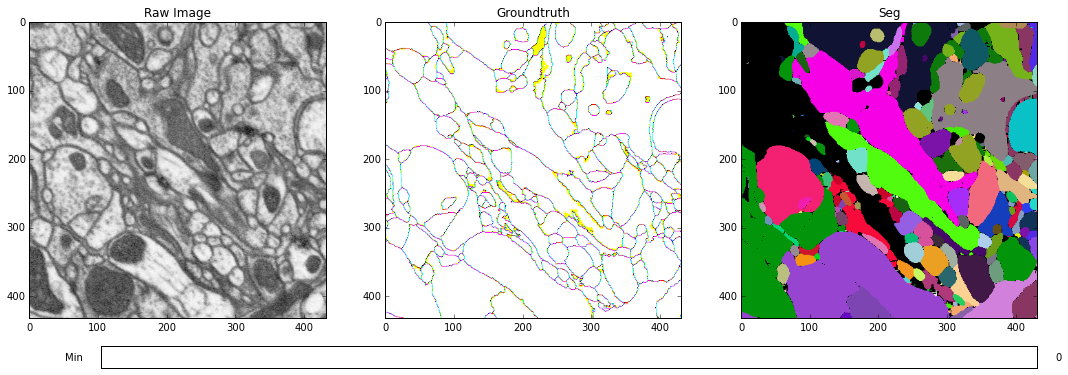

In [7]:
# loading h5
seg = segs[0]
print im.shape
print label_set.shape
print seg.shape
im,label_set=trim(im,label_set,seg)
print im.shape
print label_set.shape
print seg.shape
display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])

In [23]:
print rand
print sum(seg[0][0][0:100])

{'V_Rand_merge': [0.9694421367805383], 'V_Rand_split': [0.8428707715667361], 'V_Rand': 0.9017366019454988}
113228


In [ ]:
import sys
sys.modules.clear(  )